In [1]:
from gp import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Data

**Note**: the data has already been standardized - both the input (X) and output (Y).

In [2]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

# Hyperparameter initialization

Note that, in the below initialization, it is assumed that noise variance is the first component, signal variance the second, and length scale the third. Feel free to modify if using pytrees.

Further note: these are assumed constrained (strictly positive). You should map to unconstrained prior to running optimization, and map back to constrained when forming the GP posterior, and evaluating the predictive density for evaluation.

In [3]:
def random_init_sqexp_hyperparams():
    return np.array([jax.random.uniform(grab_prng(), minval=0.2, maxval=2),
                     jax.random.uniform(grab_prng(), minval=0.2, maxval=2),
                     X_train.shape[1]*jax.random.uniform(grab_prng(), minval=1, maxval=10)])
#

# Plotting code

In [4]:
def scatterplot(lml_lpd):
    plt.scatter(lml_lpd[:,0], lml_lpd[:,1])
    
    plt.xlabel('Log marginal likelihood')
    plt.ylabel('Negative log predictive density')
    plt.title('Is marginal likelihood a good indicator of generalization?')
    plt.legend()
#

# Experiment 1: Empirical Bayes for squared-exponential kernel

Starting experiment with 50 trials


Trials:   2%|▏         | 1/50 [00:06<05:18,  6.50s/it]

Trial 1/50 completed. Initial NLL: 194.8225, Final NLL: 13.5248, LML: -117.7924


Trials:   4%|▍         | 2/50 [00:11<04:32,  5.68s/it]

Trial 2/50 completed. Initial NLL: 148.5025, Final NLL: 13.5065, LML: -118.1068


Trials:   6%|▌         | 3/50 [00:16<04:16,  5.47s/it]

Trial 3/50 completed. Initial NLL: 182.0950, Final NLL: 13.3743, LML: -122.0135


Trials:   8%|▊         | 4/50 [00:22<04:07,  5.39s/it]

Trial 4/50 completed. Initial NLL: 189.1436, Final NLL: 13.5111, LML: -118.0255


Trials:  10%|█         | 5/50 [00:27<03:57,  5.27s/it]

Trial 5/50 completed. Initial NLL: 208.9332, Final NLL: 13.5352, LML: -117.6232


Trials:  12%|█▏        | 6/50 [00:32<03:49,  5.21s/it]

Trial 6/50 completed. Initial NLL: 178.5294, Final NLL: 13.4583, LML: -119.0697


Trials:  14%|█▍        | 7/50 [00:38<03:57,  5.51s/it]

Trial 7/50 completed. Initial NLL: 100.3515, Final NLL: 13.5526, LML: -117.3534


Trials:  16%|█▌        | 8/50 [00:44<03:53,  5.57s/it]

Trial 8/50 completed. Initial NLL: 192.0466, Final NLL: 13.3792, LML: -124.2870


Trials:  18%|█▊        | 9/50 [00:49<03:49,  5.59s/it]

Trial 9/50 completed. Initial NLL: 143.4359, Final NLL: 13.3980, LML: -120.7695


Trials:  20%|██        | 10/50 [00:55<03:40,  5.51s/it]

Trial 10/50 completed. Initial NLL: 179.6226, Final NLL: 13.4476, LML: -119.3157


Trials:  22%|██▏       | 11/50 [01:00<03:33,  5.47s/it]

Trial 11/50 completed. Initial NLL: 196.8365, Final NLL: 13.3738, LML: -123.8830


Trials:  24%|██▍       | 12/50 [01:05<03:29,  5.50s/it]

Trial 12/50 completed. Initial NLL: 208.4793, Final NLL: 13.3784, LML: -121.7107


Trials:  26%|██▌       | 13/50 [01:11<03:21,  5.44s/it]

Trial 13/50 completed. Initial NLL: 128.0967, Final NLL: 13.4377, LML: -119.5591


Trials:  28%|██▊       | 14/50 [01:16<03:18,  5.51s/it]

Trial 14/50 completed. Initial NLL: 218.3783, Final NLL: 13.4377, LML: -119.5600


Trials:  30%|███       | 15/50 [01:22<03:10,  5.44s/it]

Trial 15/50 completed. Initial NLL: 224.9021, Final NLL: 13.5193, LML: -117.8850


Trials:  32%|███▏      | 16/50 [01:27<03:03,  5.39s/it]

Trial 16/50 completed. Initial NLL: 209.9643, Final NLL: 13.3720, LML: -122.2372


Trials:  34%|███▍      | 17/50 [01:32<02:57,  5.37s/it]

Trial 17/50 completed. Initial NLL: 165.3468, Final NLL: 13.3786, LML: -121.6958


Trials:  36%|███▌      | 18/50 [01:38<02:51,  5.34s/it]

Trial 18/50 completed. Initial NLL: 151.0964, Final NLL: 13.3940, LML: -120.9277


Trials:  38%|███▊      | 19/50 [01:43<02:44,  5.30s/it]

Trial 19/50 completed. Initial NLL: 193.8844, Final NLL: 13.5498, LML: -117.3966


Trials:  40%|████      | 20/50 [01:48<02:38,  5.30s/it]

Trial 20/50 completed. Initial NLL: 185.6673, Final NLL: 13.3715, LML: -122.2971


Trials:  42%|████▏     | 21/50 [01:54<02:38,  5.45s/it]

Trial 21/50 completed. Initial NLL: 194.0424, Final NLL: 13.3728, LML: -122.1456


Trials:  44%|████▍     | 22/50 [01:59<02:32,  5.46s/it]

Trial 22/50 completed. Initial NLL: 200.5572, Final NLL: 13.4304, LML: -119.7499


Trials:  46%|████▌     | 23/50 [02:05<02:29,  5.54s/it]

Trial 23/50 completed. Initial NLL: 157.1572, Final NLL: 13.4579, LML: -119.0789


Trials:  48%|████▊     | 24/50 [02:11<02:26,  5.63s/it]

Trial 24/50 completed. Initial NLL: 202.1792, Final NLL: 13.5425, LML: -117.5079


Trials:  50%|█████     | 25/50 [02:16<02:19,  5.59s/it]

Trial 25/50 completed. Initial NLL: 211.4928, Final NLL: 13.4337, LML: -119.6617


Trials:  52%|█████▏    | 26/50 [02:22<02:14,  5.60s/it]

Trial 26/50 completed. Initial NLL: 176.7714, Final NLL: 13.3697, LML: -123.3618


Trials:  54%|█████▍    | 27/50 [02:27<02:07,  5.53s/it]

Trial 27/50 completed. Initial NLL: 160.9856, Final NLL: 13.5315, LML: -117.6821


Trials:  56%|█████▌    | 28/50 [02:33<02:00,  5.46s/it]

Trial 28/50 completed. Initial NLL: 231.7788, Final NLL: 13.3776, LML: -124.1790


Trials:  58%|█████▊    | 29/50 [02:38<01:55,  5.51s/it]

Trial 29/50 completed. Initial NLL: 169.5036, Final NLL: 13.4573, LML: -119.0919


Trials:  60%|██████    | 30/50 [02:44<01:50,  5.54s/it]

Trial 30/50 completed. Initial NLL: 181.1149, Final NLL: 13.4400, LML: -119.5010


Trials:  62%|██████▏   | 31/50 [02:50<01:45,  5.57s/it]

Trial 31/50 completed. Initial NLL: 199.5217, Final NLL: 13.5403, LML: -117.5422


Trials:  64%|██████▍   | 32/50 [02:55<01:39,  5.51s/it]

Trial 32/50 completed. Initial NLL: 182.4455, Final NLL: 13.4475, LML: -119.3191


Trials:  66%|██████▌   | 33/50 [03:00<01:33,  5.49s/it]

Trial 33/50 completed. Initial NLL: 218.4292, Final NLL: 13.3711, LML: -122.3481


Trials:  68%|██████▊   | 34/50 [03:06<01:28,  5.53s/it]

Trial 34/50 completed. Initial NLL: 175.7793, Final NLL: 13.4261, LML: -119.8671


Trials:  70%|███████   | 35/50 [03:11<01:21,  5.46s/it]

Trial 35/50 completed. Initial NLL: 166.2739, Final NLL: 13.3999, LML: -120.6964


Trials:  72%|███████▏  | 36/50 [03:17<01:17,  5.53s/it]

Trial 36/50 completed. Initial NLL: 210.0357, Final NLL: 13.5510, LML: -117.3783


Trials:  74%|███████▍  | 37/50 [03:23<01:12,  5.59s/it]

Trial 37/50 completed. Initial NLL: 186.7577, Final NLL: 13.3772, LML: -121.7894


Trials:  76%|███████▌  | 38/50 [03:29<01:08,  5.68s/it]

Trial 38/50 completed. Initial NLL: 118.0673, Final NLL: 13.4248, LML: -119.9034


Trials:  78%|███████▊  | 39/50 [03:34<01:01,  5.63s/it]

Trial 39/50 completed. Initial NLL: 101.6015, Final NLL: 13.4890, LML: -118.4321


Trials:  80%|████████  | 40/50 [03:40<00:55,  5.54s/it]

Trial 40/50 completed. Initial NLL: 206.4627, Final NLL: 13.4790, LML: -118.6304


Trials:  82%|████████▏ | 41/50 [03:45<00:50,  5.58s/it]

Trial 41/50 completed. Initial NLL: 173.4567, Final NLL: 13.3795, LML: -121.6366


Trials:  84%|████████▍ | 42/50 [03:51<00:45,  5.68s/it]

Trial 42/50 completed. Initial NLL: 169.7891, Final NLL: 13.3912, LML: -121.0441


Trials:  86%|████████▌ | 43/50 [03:56<00:38,  5.57s/it]

Trial 43/50 completed. Initial NLL: 221.6427, Final NLL: 13.4652, LML: -118.9174


Trials:  88%|████████▊ | 44/50 [04:02<00:32,  5.48s/it]

Trial 44/50 completed. Initial NLL: 223.3361, Final NLL: 13.5293, LML: -117.7185


Trials:  90%|█████████ | 45/50 [04:07<00:27,  5.43s/it]

Trial 45/50 completed. Initial NLL: 215.6679, Final NLL: 13.4514, LML: -119.2273


Trials:  92%|█████████▏| 46/50 [04:12<00:21,  5.39s/it]

Trial 46/50 completed. Initial NLL: 121.4350, Final NLL: 13.5188, LML: -117.8923


Trials:  94%|█████████▍| 47/50 [04:18<00:16,  5.35s/it]

Trial 47/50 completed. Initial NLL: 174.1285, Final NLL: 13.5086, LML: -118.0702


Trials:  96%|█████████▌| 48/50 [04:23<00:10,  5.35s/it]

Trial 48/50 completed. Initial NLL: 143.4921, Final NLL: 13.4305, LML: -119.7477


Trials:  98%|█████████▊| 49/50 [04:28<00:05,  5.31s/it]

Trial 49/50 completed. Initial NLL: 123.4496, Final NLL: 13.4555, LML: -119.1334


Trials: 100%|██████████| 50/50 [04:34<00:00,  5.49s/it]

Trial 50/50 completed. Initial NLL: 160.2026, Final NLL: 13.3844, LML: -121.3610
Average Initial NLL: 179.5539
Average Final NLL: 13.4467


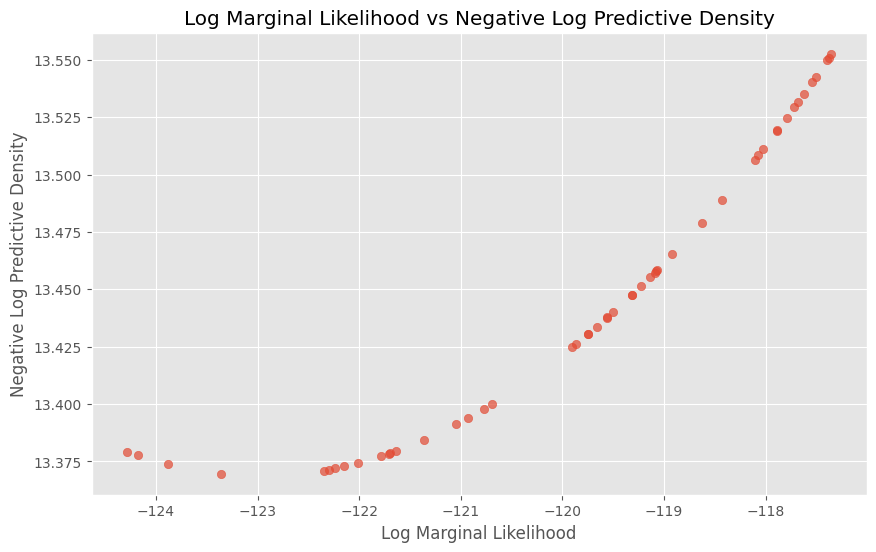

In [5]:
from tqdm import tqdm

n_trials = 50
T = 200
step_size = 5e-4

gathered_trials = []

print(f"Starting experiment with {n_trials} trials")

for n in tqdm(range(n_trials), desc="Trials"):
    init_prng(n)
    # Random initialization
    unconstrained_init = inverse_param_transform(random_init_sqexp_hyperparams())
    
    # Run empirical Bayes optimization
    optimized_hyperparams, final_lml = empirical_bayes(
        cov_func=sqexp_cov_function,
        X_train=X_train,
        Y_train=Y_train,
        unconstrained_hyperparams_init=unconstrained_init,
        step_size=step_size,
        T=T
    )
    
    # Compute initial negative log predictive density
    initial_constrained = param_transform(unconstrained_init)
    posterior_init = gp_posterior(sqexp_cov_function, X_train, Y_train, initial_constrained)
    mean_init, var_init = posterior_init(X_test)
    initial_nll = neg_log_predictive_density(Y_test, mean_init, var_init, initial_constrained[0])
    
    # Compute final negative log predictive density
    final_constrained = param_transform(optimized_hyperparams)
    posterior_final = gp_posterior(sqexp_cov_function, X_train, Y_train, final_constrained)
    mean_final, var_final = posterior_final(X_test)
    final_nll = neg_log_predictive_density(Y_test, mean_final, var_final, final_constrained[0])
    
    # Store results
    gathered_trials.append({
        'initial_nll': initial_nll,
        'final_nll': final_nll,
        'log_marginal_likelihood': final_lml
    })
    print(f"Trial {n+1}/{n_trials} completed. Initial NLL: {initial_nll:.4f}, Final NLL: {final_nll:.4f}, LML: {final_lml:.4f}")


# Convert gathered_trials to numpy array for easier manipulation
initial_nlls = np.array([trial['initial_nll'] for trial in gathered_trials])
final_nlls = np.array([trial['final_nll'] for trial in gathered_trials])
log_marginal_likelihoods = np.array([trial['log_marginal_likelihood'] for trial in gathered_trials])

# Verify improvement
average_initial_nll = np.mean(initial_nlls)
average_final_nll = np.mean(final_nlls)

print(f"Average Initial NLL: {average_initial_nll:.4f}")
print(f"Average Final NLL: {average_final_nll:.4f}")

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(log_marginal_likelihoods, final_nlls, alpha=0.7)
plt.xlabel('Log Marginal Likelihood')
plt.ylabel('Negative Log Predictive Density')
plt.title('Log Marginal Likelihood vs Negative Log Predictive Density')
plt.grid(True)
plt.show()



In this experiment, we ran Empirical Bayes optimization across 50 trials with different random initializations. For each trial, we initialized the hyperparameters randomly, optimized them using gradient ascent on the log marginal likelihood, and recorded the negative log predictive density (NLL) before and after optimization.

### Results

- **Average Initial NLL:** 179.5539
- **Average Final NLL:** 13.4467

The average NLL consistently improved after optimization, indicating that the Empirical Bayes approach effectively enhanced the model's predictive performance.

### Log Marginal Likelihood vs Negative Log Predictive Density

The scatterplot shown also illustrates the relationship between the log marginal likelihood and the negative log predictive density across all trials.

**Observation:** There is a noticeable inverse relationship between the log marginal likelihood and the NLL. Higher marginal likelihoods correspond to lower NLL values, suggesting that the marginal likelihood is a good indicator of the model's generalization performance.

# Experiment 2 - feature importance using learned Mahalanobis distances

In [ ]:
# Experiment 2 - Feature Importance Using Learned Mahalanobis Distances

import pandas as pd

# Define feature names based on the dataset description
feature_names = [
    "Hour of Day",
    "Carbon Monoxide Level",
    "Non-Methane Hydrocarbons Level",
    "Nitrogen Oxides Level",
    "Temperature",
    "Relative Humidity",
    "Absolute Humidity"
]

# Initialize hyperparameters: [noise variance, signal variance, length scales...]
init_params = [1e0, 1e0] + [X_train.shape[1]*1e0 for _ in range(X_train.shape[1])]
init_params = np.array(init_params)

# Perform a single run of Empirical Bayes with Mahalanobis Squared-Exponential Kernel
optimized_hyperparams, final_lml = empirical_bayes(
    cov_func=sqexp_mahalanobis_cov_function,
    X_train=X_train,
    Y_train=Y_train,
    unconstrained_hyperparams_init=inverse_param_transform(init_params),
    step_size=5e-4,
    T=200
)

# Transform optimized hyperparameters back to constrained space
final_constrained = param_transform(optimized_hyperparams)

# Compute Negative Log Predictive Density after optimization
posterior_final = gp_posterior(sqexp_mahalanobis_cov_function, X_train, Y_train, final_constrained)
mean_final, var_final = posterior_final(X_test)
final_nll = neg_log_predictive_density(Y_test, mean_final, var_final, final_constrained[0])

print(f"Final Negative Log Predictive Density: {final_nll:.4f}")

# Extract and display the learned hyperparameters
noise_variance = final_constrained[0]
signal_variance = final_constrained[1]
length_scales = final_constrained[2:]

hyperparams_df = pd.DataFrame({
    "Feature": feature_names,
    "Length Scale": length_scales
})

print("Learned Hyperparameters:")
display(hyperparams_df)

Final Negative Log Predictive Density: 14.8252
Learned Hyperparameters:


,Feature,Length Scale
0,Hour of Day,5.760905
1,Carbon Monoxide Level,2.788450
2,Non-Methane Hydrocarbons Level,3.631931
3,Nitrogen Oxides Level,1.580439
4,Temperature,11.521996
5,Relative Humidity,10.814553
6,Absolute Humidity,6.574848


### Discussion on Learned Hyperparameters and Feature Importance

After performing Empirical Bayes optimization using the Mahalanobis Squared-Exponential Kernel, we obtained the learned hyperparameters for each feature (see table right above).

The importance of a feature is inversely related to its length scale $ \ell $ in the covariance function. Smaller length scales indicate that the function varies more rapidly with that feature, implying that the feature has a significant impact on the model's predictions. 

The covariance function using a Squared-Exponential (SE) kernel is defined as:

$
k(x, x') = \sigma_f^2 \exp\left( -\frac{1}{2} \sum_{i=1}^{d} \frac{(x_i - x'_i)^2}{\ell_i^2} \right)
$

Where:
- $ k(x, x') $ is the covariance between two data points $ x $ and $ x' $.
- $\sigma_f^2 $ is the signal variance.
- $ \ell_i $ is the length scale for the $i$-th feature.
- $ x_i $ and $ x'_i $ are the values of the $i$-th feature for the two data points.

The importance of a feature $ i $ is determined by its length scale $ \ell_i $. Smaller $ \ell_i $ implies higher sensitivity to changes in feature $i $.

$
\text{Feature Importance} \propto \frac{1}{\ell_i}
$

Based on the learned length scales, we can see that the most important features are those with smaller length scales like "Nitrogen Oxides Level" and "Non-Methane Hydrocarbons Level". This indicates high sensitivity and significant influence on benzene level predictions. The least important features are the ones with the largest length scales. This is exemplified by features such as "Relative Humidity" or "Temperature", which suggests minimal impact on predictive performance.

In general, Empirical Bayes optimizes hyperparameters by balancing data fit and model complexity. The marginal likelihood maximized during this process is given by:

$
\log p(\mathbf{y}|\mathbf{X}, \theta) = -\frac{1}{2} \mathbf{y}^T K^{-1} \mathbf{y} - \frac{1}{2} \log |K| - \frac{n}{2} \log 2\pi
$

Where:
- $ \mathbf{y} $ is the vector of observed data.
- $ K $ is the covariance matrix.
- $ \theta $ are the hyperparameters (e.g., $ \ell $ and $ \sigma_f^2 $).

By learning appropriate length scales, the model avoids overfitting by not relying excessively on noisy or irrelevant features. If a feature does not significantly improve the data fit, Empirical Bayes will increase its length scale, effectively reducing its importance. This automatic relevance determination ensures that only the most informative features influence the predictions, enhancing the model's generalization capabilities.